In [26]:
from _3D_LungSegmentation_Threshold import get_segmented_lungs
from _3D_CT_Preprocess import preprocessScan
from _3D_CT_Preprocess import getScan
from _3D_CT_Preprocess import normalizeScan
from _3D_CT_Preprocess import resizeScan
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from scipy import ndimage
import os

In [ ]:
#1. Get CT data and lung mask data from LUNA16

In [109]:
CT_Scan_Path = "/Users/phoenixji/Desktop/LungData/LUNA16/AllSet/"
Lung_Path = '/Users/phoenixji/Desktop/LungData/seg-lungs-LUNA16/'

In [110]:
Scan_List = os.listdir(CT_Scan_Path)
Mask_List = os.listdir(Lung_Path)

In [111]:
len(Scan_List),len(Mask_List)

(1776, 1776)

In [112]:
CT_Scan_List=[]
Lung_Mask_List=[]

In [113]:
for scan in Scan_List:
    
    if scan.endswith('.mhd'):
        CT_Scan_List.append(scan)

In [114]:
for mask in Mask_List:
    
    if mask.endswith('.mhd'):
        Lung_Mask_List.append(mask)

In [115]:
len(CT_Scan_List),len(Lung_Mask_List)

(888, 888)

In [116]:
CT_Scan=[]
Lung_Mask=[]

In [117]:
for Scan in CT_Scan_List:
    
    # Add the loriginal CT
    scan = preprocessScan(CT_Scan_Path+Scan,(128,128,64))
    CT_Scan.append(scan)
    
    # Add the lung mask
    scan = getScan(Lung_Path+Scan)
    
    if(scan.shape[0] != scan.shape[1]):
        scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
        scan = np.swapaxes(scan,1,2)
    
    scan = resizeScan(scan,(128,128,64))
    scan = np.where(scan==0,scan,1)  # Update to only 2 labels
    
    Lung_Mask.append(scan)

In [121]:
len(CT_Scan),len(Lung_Mask)

(888, 888)

In [120]:
CT_Scan[0].shape, Lung_Mask[0].shape

((128, 128, 64), (128, 128, 64))

In [125]:
np.unique(Lung_Mask[0])

array([0, 1], dtype=int16)

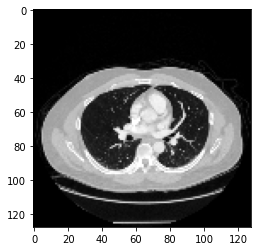

In [135]:
plt.imshow(CT_Scan[3][:,:,30],cmap='gray')

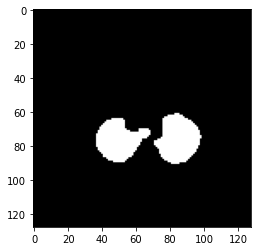

In [133]:
plt.imshow(Lung_Mask[3][:,:,50],cmap='gray')

In [ ]:
# Cover data to the np array

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(CT_Scan), np.array(Lung_Mask), 
                                                    test_size = 0.20, random_state = 0,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((710, 128, 128, 64),
 (178, 128, 128, 64),
 (710, 128, 128, 64),
 (178, 128, 128, 64))

In [137]:
np.save('X_train_3D_lungSeg',X_train)
np.save('X_test_3D_lungSeg',X_test)
np.save('y_train_3D_lungSeg',y_train)
np.save('y_test_3D_lungSeg',y_test)

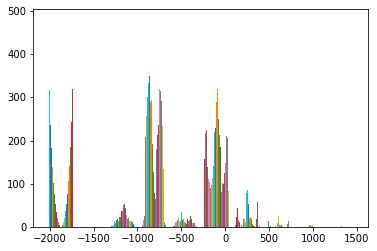

In [110]:
hist, bins, _ = plt.hist(scanTest[20]) # hist contains the list of pixels with the same intensity for each intensity in the picture
plt.show() #

# load Data

In [ ]:
NonCovidScan_Path=[]
CovidScan_Path=[]

In [145]:
NonCovidScan_PathName = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-0/"

In [146]:
NonCovidScan_Path = os.listdir(NonCovidScan_PathName)

In [147]:
len(NonCovidScan_Path)

254

In [3]:
dataset = []
label = []

In [ ]:
for scan in NonCovidScan_Path:
    
    scan = getScan(NonCovidScan_PathName+scan)
    mask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~mask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
    scan = np.swapaxes(scan,1,2)
    scan = resizeScan_(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
    dataset.append(scan)
    label.append(0)


In [27]:
len(dataset)

854

In [28]:
len(label)

854

In [6]:
plt.imshow(dataset[680][:,:,35],cmap='gray')

NameError: name 'plt' is not defined

In [23]:
CovidScan_PathName_1 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-1/"
CovidScan_PathName_2 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-2/"
CovidScan_PathName_3 = "/Users/phoenixji/Desktop/LungData/MosMedData/CT-3/"


In [24]:
CovidScan_Path = os.listdir(CovidScan_PathName_3)

In [25]:
len(CovidScan_Path)

45

In [ ]:
#改三次
for scan in CovidScan_Path:
    
    scan = getScan(CovidScan_PathName_3+scan)
    mask = np.array([get_segmented_lungs(slice.copy()) for slice in scan])
    scan[~mask] = 0
    scan = normalizeScan(scan)
    print("Before Resize"+str(scan.shape))
    scan = np.swapaxes(scan,0,1)  #(64,128,128) => (128,128,64)
    scan = np.swapaxes(scan,1,2)
    scan = resizeScan_(scan,(128,128,64))
    scan = np.expand_dims(scan,axis=-1)
    print("After Resize"+str(scan.shape))
    dataset.append(scan)
    label.append(3)


In [138]:
len()

710

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(dataset), np.array(label), 
                                                    test_size = 0.20, random_state = 0,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((683, 128, 128, 64, 1), (171, 128, 128, 64, 1), (683,), (171,))

In [31]:
np.save('X_train_lungSeg_pos3class',X_train)
np.save('X_test_lungSeg_pos3class',X_test)
np.save('y_train_lungSeg_pos3class',y_train)
np.save('y_test_lungSeg_pos3class',y_test)

In [29]:
np.save('dataset',dataset)
np.save('label',label)